# Homework_3 : California Housing Price Prediction

> Note: sometimes your answer doesn't match one of the options exactly. That's fine. 
Select the option that's closest to your solution.

### Dataset

In this homework, we will use the California Housing Prices data from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```
We'll keep working with the `'median_house_value'` variable, and we'll transform it to a classification task. 
 

### Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`,
* `'ocean_proximity'`,

### Data preparation

* Select only the features from above and fill in the missing values with 0.
* Create a new column `rooms_per_household` by dividing the column `total_rooms` by the column `households` from dataframe. 
* Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe. 
* Create a new column `population_per_household` by dividing the column `population` by the column `households` from dataframe. 

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mutual_info_score, mean_squared_error

In [2]:
# download the data
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
#!wget $data -O housing-data-homework-3.csv

In [3]:
# load the data
df = pd.read_csv('housing-data-homework-3.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
len(df)

20640

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay


In [7]:
df.head().T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,565.0
households,126.0,1138.0,177.0,219.0,259.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0
ocean_proximity,near_bay,near_bay,near_bay,near_bay,near_bay


In [8]:
df = df[
    ['latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value',
    'ocean_proximity']
]

df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay
...,...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,inland
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,inland
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,inland
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,inland


In [9]:
# missing values
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
df['total_bedrooms'].isnull().value_counts()

False    20433
True       207
Name: total_bedrooms, dtype: int64

In [11]:
df['total_bedrooms'].isnull().value_counts(normalize=True)

False    0.989971
True     0.010029
Name: total_bedrooms, dtype: float64

In [12]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(0)
df['total_bedrooms'].isnull().value_counts()

False    20640
Name: total_bedrooms, dtype: int64

In [13]:
df.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [14]:
# create new columns
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [15]:
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay,6.984127,0.146591,2.555556
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay,6.238137,0.155797,2.109842
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay,8.288136,0.129516,2.802260
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay,5.817352,0.184458,2.547945
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,inland,5.045455,0.224625,2.560606
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,inland,6.114035,0.215208,3.122807
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,inland,5.205543,0.215173,2.325635
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,inland,5.329513,0.219892,2.123209


### Question 1

What is the most frequent observation (mode) for the column `ocean_proximity`?

Options:
* `NEAR BAY`
* `<1H OCEAN`
* `INLAND`
* `NEAR OCEAN`

In [16]:
df['ocean_proximity'].unique()

array(['near_bay', '<1h_ocean', 'inland', 'near_ocean', 'island'],
      dtype=object)

In [17]:
df['ocean_proximity'].nunique()

5

In [18]:
df['ocean_proximity'].mode()

0    <1h_ocean
Name: ocean_proximity, dtype: object

**Q1 answer: <1h_ocean**

### Make median_house_value binary
- We need to turn the median_house_value variable from numeric into binary.
- Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.

In [19]:
mean_mhv = round(df['median_house_value'].mean(), 2)
mean_mhv

206855.82

In [20]:
df['above_average'] = df['median_house_value'].map(lambda x: 1 if x >= mean_mhv else 0)
df['above_average']

0        1
1        1
2        1
3        1
4        1
        ..
20635    0
20636    0
20637    0
20638    0
20639    0
Name: above_average, Length: 20640, dtype: int64

In [21]:
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay,6.984127,0.146591,2.555556,1
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay,6.238137,0.155797,2.109842,1
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay,8.288136,0.129516,2.802260,1
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay,5.817352,0.184458,2.547945,1
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay,6.281853,0.172096,2.181467,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,inland,5.045455,0.224625,2.560606,0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,inland,6.114035,0.215208,3.122807,0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,inland,5.205543,0.215173,2.325635,0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,inland,5.329513,0.219892,2.123209,0


### One hot encoding of categorical column 'ocean_proximity'

In [22]:
df.dtypes

latitude                    float64
longitude                   float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
above_average                 int64
dtype: object

In [23]:
df['ocean_proximity'].unique()

array(['near_bay', '<1h_ocean', 'inland', 'near_ocean', 'island'],
      dtype=object)

In [24]:
# 1 hot encoding using dummies
df_with_dummies = pd.get_dummies(df['ocean_proximity'], columns=['near_bay', '<1h_ocean', 'inland', 'near_ocean', 'island'])
df_with_dummies

,<1h_ocean,inland,island,near_bay,near_ocean
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [25]:
# concatenate 2 dataframes
final_df = pd.concat([df, df_with_dummies], axis=1)

#drop 'ocean_proximity' column
final_df.drop('ocean_proximity', axis=1, inplace=True)

#drop 'median_house_value' column
final_df.drop('median_house_value', axis=1, inplace=True)

#view final df
final_df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,above_average,<1h_ocean,inland,island,near_bay,near_ocean
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,0.146591,2.555556,1,0,0,0,1,0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.155797,2.109842,1,0,0,0,1,0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,0.129516,2.802260,1,0,0,0,1,0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,0.184458,2.547945,1,0,0,0,1,0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,0.172096,2.181467,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,5.045455,0.224625,2.560606,0,0,1,0,0,0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,6.114035,0.215208,3.122807,0,0,1,0,0,0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,5.205543,0.215173,2.325635,0,0,1,0,0,0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,5.329513,0.219892,2.123209,0,0,1,0,0,0


## Split the data

* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
* Make sure that the target value (`median_house_value`) is not in your dataframe

In [26]:
df_full_train, df_test = train_test_split(final_df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [27]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [28]:
y_train = df_train['above_average'].values
y_val = df_val['above_average'].values
y_test = df_test['above_average'].values

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [29]:
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,<1h_ocean,inland,island,near_bay,near_ocean
0,34.43,-119.67,39.0,1467.0,381.0,1404.0,374.0,2.3681,3.922460,0.259714,3.754011,1,0,0,0,0
1,33.74,-118.32,24.0,6097.0,794.0,2248.0,806.0,10.1357,7.564516,0.130228,2.789082,0,0,0,0,1
2,39.13,-121.62,41.0,1317.0,309.0,856.0,337.0,1.6719,3.908012,0.234624,2.540059,0,1,0,0,0
3,34.24,-118.63,9.0,4759.0,924.0,1884.0,915.0,4.8333,5.201093,0.194158,2.059016,1,0,0,0,0
4,37.52,-122.30,38.0,2769.0,387.0,994.0,395.0,5.5902,7.010127,0.139762,2.516456,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12379,33.79,-118.29,16.0,1867.0,571.0,951.0,498.0,3.3427,3.748996,0.305838,1.909639,1,0,0,0,0
12380,38.04,-121.34,16.0,3295.0,565.0,2279.0,576.0,3.6083,5.720486,0.171472,3.956597,0,1,0,0,0
12381,32.74,-116.99,18.0,3341.0,611.0,1952.0,602.0,3.9844,5.549834,0.182879,3.242525,1,0,0,0,0
12382,33.84,-117.87,16.0,1545.0,354.0,730.0,350.0,4.5112,4.414286,0.229126,2.085714,1,0,0,0,0


In [30]:
y_train

array([1, 1, 0, ..., 1, 0, 0])

### Question 2

* Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

Options:
* `total_bedrooms` and `households`
* `total_bedrooms` and `total_rooms`
* `population` and `households`
* `population_per_household` and `total_rooms`

In [31]:
corrM = df_train.corr()
corrM = round(corrM, 2)
corrM

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,<1h_ocean,inland,island,near_bay,near_ocean
latitude,1.00,-0.93,0.00,-0.03,-0.06,-0.10,-0.06,-0.08,0.12,-0.12,-0.00,-0.44,0.35,-0.01,0.36,-0.17
longitude,-0.93,1.00,-0.10,0.04,0.06,0.09,0.05,-0.02,-0.03,0.10,0.01,0.31,-0.05,0.01,-0.48,0.06
housing_median_age,0.00,-0.10,1.00,-0.36,-0.32,-0.29,-0.31,-0.12,-0.18,0.13,0.01,0.05,-0.24,0.01,0.25,0.03
total_rooms,-0.03,0.04,-0.36,1.00,0.93,0.85,0.92,0.20,0.17,-0.19,-0.03,-0.01,0.04,-0.00,-0.02,-0.02
total_bedrooms,-0.06,0.06,-0.32,0.93,1.00,0.88,0.98,-0.01,0.01,0.08,-0.03,0.01,0.00,0.00,-0.02,-0.00
population,-0.10,0.09,-0.29,0.85,0.88,1.00,0.91,-0.00,-0.08,0.03,0.06,0.07,-0.01,-0.01,-0.06,-0.03
households,-0.06,0.05,-0.31,0.92,0.98,0.91,1.00,0.01,-0.09,0.06,-0.03,0.03,-0.03,-0.00,-0.01,-0.00
median_income,-0.08,-0.02,-0.12,0.20,-0.01,-0.00,0.01,1.00,0.39,-0.62,-0.00,0.17,-0.24,-0.01,0.06,0.02
rooms_per_household,0.12,-0.03,-0.18,0.17,0.01,-0.08,-0.09,0.39,1.00,-0.50,0.00,-0.11,0.17,-0.00,-0.03,-0.04
bedrooms_per_room,-0.12,0.10,0.13,-0.19,0.08,0.03,0.06,-0.62,-0.50,1.00,-0.00,0.08,-0.12,0.01,-0.00,0.05


In [32]:
# Retain upper triangular values of correlation matrix and
# make Lower triangular values Null
upper_corr_mat = corrM.where(
    np.triu(np.ones(corrM.shape), k=1).astype(bool))
  
# Convert to 1-D series and drop Null values
unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
# Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values()
print(sorted_mat)

longitude          latitude              -0.93
bedrooms_per_room  median_income         -0.62
inland             <1h_ocean             -0.61
bedrooms_per_room  rooms_per_household   -0.50
near_bay           longitude             -0.48
                                          ... 
population         total_bedrooms         0.88
households         population             0.91
                   total_rooms            0.92
total_bedrooms     total_rooms            0.93
households         total_bedrooms         0.98
Length: 120, dtype: float64


<AxesSubplot:>

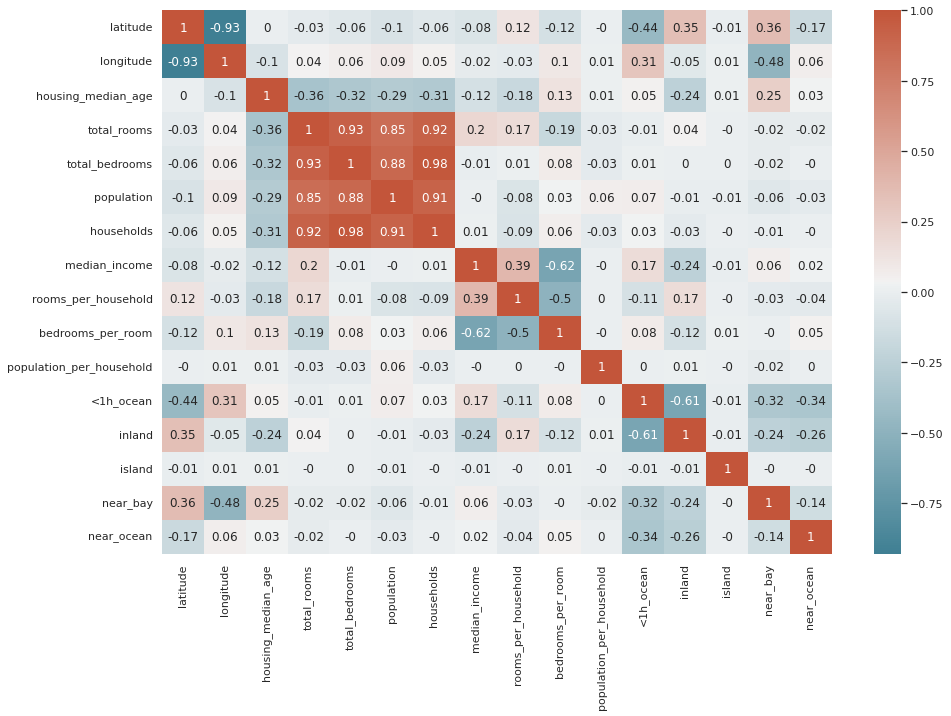

In [33]:
# sns plot for correlation matrix
plt.subplots(figsize=(15,10))
sns.heatmap(corrM, xticklabels=corrM.columns, yticklabels=corrM.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

**Q2 answer: total_bedrooms and households**

### Question 3

* Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
* What is the value of mutual information?
* Round it to 2 decimal digits using `round(score, 2)`

Options:
- 0.26
- 0
- 0.10
- 0.16

In [34]:
# using original dataframe 'df' since we dropped 'ocean_proximity' earlier
score = mutual_info_score(df['above_average'], df['ocean_proximity'])
round(score, 2)

0.1

**Q3 Answer: 0.10**

### Question 4

* Now let's train a logistic regression
* Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:
- 0.60
- 0.72
- 0.84
- 0.95

In [35]:
df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,<1h_ocean,inland,island,near_bay,near_ocean
0,34.43,-119.67,39.0,1467.0,381.0,1404.0,374.0,2.3681,3.922460,0.259714,3.754011,1,0,0,0,0
1,33.74,-118.32,24.0,6097.0,794.0,2248.0,806.0,10.1357,7.564516,0.130228,2.789082,0,0,0,0,1
2,39.13,-121.62,41.0,1317.0,309.0,856.0,337.0,1.6719,3.908012,0.234624,2.540059,0,1,0,0,0
3,34.24,-118.63,9.0,4759.0,924.0,1884.0,915.0,4.8333,5.201093,0.194158,2.059016,1,0,0,0,0
4,37.52,-122.30,38.0,2769.0,387.0,994.0,395.0,5.5902,7.010127,0.139762,2.516456,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12379,33.79,-118.29,16.0,1867.0,571.0,951.0,498.0,3.3427,3.748996,0.305838,1.909639,1,0,0,0,0
12380,38.04,-121.34,16.0,3295.0,565.0,2279.0,576.0,3.6083,5.720486,0.171472,3.956597,0,1,0,0,0
12381,32.74,-116.99,18.0,3341.0,611.0,1952.0,602.0,3.9844,5.549834,0.182879,3.242525,1,0,0,0,0
12382,33.84,-117.87,16.0,1545.0,354.0,730.0,350.0,4.5112,4.414286,0.229126,2.085714,1,0,0,0,0


In [36]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [37]:
# this may take few minute to execute
model.fit(df_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [38]:
model.intercept_[0]

-0.0653458469683418

In [39]:
model.coef_[0].round(3)

array([ 0.095,  0.08 ,  0.036, -0.   ,  0.002, -0.002,  0.004,  1.211,
       -0.026,  0.128,  0.01 ,  0.446, -1.544,  0.013,  0.289,  0.73 ])

In [40]:
# Predict on the val data
predictions = model.predict(df_val)

# Score our model
print('Accuracy score: ', format(accuracy_score(y_val, predictions)))
print('Precision score: ', format(precision_score(y_val, predictions)))
print('Recall score: ', format(recall_score(y_val, predictions)))
print('F1 score: ', format(f1_score(y_val, predictions)))

Accuracy score:  0.8362403100775194
Precision score:  0.8026394721055788
Recall score:  0.7940652818991097
F1 score:  0.7983293556085919


In [41]:
round(accuracy_score(y_val, predictions), 2)

0.84

**Q4 Answer: 0.84**

In [42]:
# Predict on the test data
predictions = model.predict(df_test)

# Score our model
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.8335755813953488
Precision score:  0.804416403785489
Recall score:  0.7717917675544794
F1 score:  0.787766450417053


In [43]:
model.predict(df_test[:5])

array([0, 0, 1, 1, 0])

In [44]:
y_test[:5]

array([0, 0, 1, 1, 1])

In [45]:
model.predict(df_val[:10])

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [46]:
y_val[:10]

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 
* Which of following feature has the smallest difference? 
   * `total_rooms`
   * `total_bedrooms` 
   * `population`
   * `households`

> **note**: the difference doesn't have to be positive

In [47]:
# we will use a bit different approach - using corr matrix, below features are most important. We will use them and train a model.
small = ['total_rooms', 'total_bedrooms', 'population', 'households']

In [48]:
df_train_small = df_train[small]
df_val_small = df_val[small]
df_test_small = df_test[small]
df_train_small

,total_rooms,total_bedrooms,population,households
0,1467.0,381.0,1404.0,374.0
1,6097.0,794.0,2248.0,806.0
2,1317.0,309.0,856.0,337.0
3,4759.0,924.0,1884.0,915.0
4,2769.0,387.0,994.0,395.0
...,...,...,...,...
12379,1867.0,571.0,951.0,498.0
12380,3295.0,565.0,2279.0,576.0
12381,3341.0,611.0,1952.0,602.0
12382,1545.0,354.0,730.0,350.0


In [49]:
#  Fit the model
model.fit(df_train_small, y_train)

# Predict on the val data
predictions = model.predict(df_val_small)

# Score our model
print('Accuracy score: ', format(accuracy_score(y_val, predictions)))
print('Precision score: ', format(precision_score(y_val, predictions)))
print('Recall score: ', format(recall_score(y_val, predictions)))
print('F1 score: ', format(f1_score(y_val, predictions)))

original_accuracy = round(accuracy_score(y_val, predictions), 2)
original_accuracy

Accuracy score:  0.7095445736434108
Precision score:  0.6934713375796179
Recall score:  0.5169139465875371
F1 score:  0.592315538932336


0.71

In [50]:
# drop 1 of 4 features at a time
small_1 = ['total_bedrooms', 'population', 'households']
small_2 = ['total_rooms', 'population', 'households']
small_3 = ['total_rooms', 'total_bedrooms', 'households']
small_4 = ['total_rooms', 'total_bedrooms', 'population']

df_train_small_1 = df_train[small_1]
df_val_small_1 = df_val[small_1]
df_test_small_1 = df_test[small_1]

df_train_small_2 = df_train[small_2]
df_val_small_2 = df_val[small_2]
df_test_small_2 = df_test[small_2]

df_train_small_3 = df_train[small_3]
df_val_small_3 = df_val[small_3]
df_test_small_3 = df_test[small_3]

df_train_small_4 = df_train[small_4]
df_val_small_4 = df_val[small_4]
df_test_small_4 = df_test[small_4]

In [51]:
#  Fit the model
model.fit(df_train_small_1, y_train)

# Predict on the val data
predictions = model.predict(df_val_small_1)

# Score our model
accuracy_1 = round(accuracy_score(y_val, predictions), 2)
accuracy_1

0.63

In [52]:
#  Fit the model
model.fit(df_train_small_2, y_train)

# Predict on the val data
predictions = model.predict(df_val_small_2)

# Score our model
accuracy_2 = round(accuracy_score(y_val, predictions), 2)
accuracy_2

0.66

In [53]:
#  Fit the model
model.fit(df_train_small_3, y_train)

# Predict on the val data
predictions = model.predict(df_val_small_3)

# Score our model
accuracy_3 = round(accuracy_score(y_val, predictions), 2)
accuracy_3

0.66

In [54]:
#  Fit the model
model.fit(df_train_small_4, y_train)

# Predict on the val data
predictions = model.predict(df_val_small_4)

# Score our model
accuracy_4 = round(accuracy_score(y_val, predictions), 2)
accuracy_4

0.67

In [55]:
round((original_accuracy - accuracy_1), 2)

0.08

In [56]:
round((original_accuracy - accuracy_2), 2)

0.05

In [57]:
round((original_accuracy - accuracy_3), 2)

0.05

In [58]:
round((original_accuracy - accuracy_4), 2)

0.04

**Q5 answer: 'households'**

### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column `'median_house_value'`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model (`model = Ridge(alpha=a, solver="sag", random_state=42)`) on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest `alpha`.

Options:
- 0
- 0.01
- 0.1
- 1
- 10

In [59]:
# load the data
df = pd.read_csv('housing-data-homework-3.csv')

# lowercase and replace spaces
df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

# Take care of missing values
df['total_bedrooms'] = df['total_bedrooms'].fillna(0)

# create new columns
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

# 1 hot encoding using dummies
df_with_dummies = pd.get_dummies(df['ocean_proximity'], columns=['near_bay', '<1h_ocean', 'inland', 'near_ocean', 'island'])

# concatenate 2 dataframes
final_df = pd.concat([df, df_with_dummies], axis=1)

#drop 'ocean_proximity' column
final_df.drop('ocean_proximity', axis=1, inplace=True)

# split the dataset
df_full_train, df_test = train_test_split(final_df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
len(df_train), len(df_val), len(df_test)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train['median_house_value'] = np.log1p(df_train['median_house_value'])
df_val['median_house_value'] = np.log1p(df_val['median_house_value'])
df_test['median_house_value'] = np.log1p(df_test['median_house_value'])

y_train = df_train['median_house_value']
y_val = df_val['median_house_value']
y_test = df_test['median_house_value']

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [60]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,<1h_ocean,inland,island,near_bay,near_ocean
0,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,3.922460,0.259714,3.754011,1,0,0,0,0
1,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,7.564516,0.130228,2.789082,0,0,0,0,1
2,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,3.908012,0.234624,2.540059,0,1,0,0,0
3,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,5.201093,0.194158,2.059016,1,0,0,0,0
4,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,7.010127,0.139762,2.516456,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12379,-118.29,33.79,16.0,1867.0,571.0,951.0,498.0,3.3427,3.748996,0.305838,1.909639,1,0,0,0,0
12380,-121.34,38.04,16.0,3295.0,565.0,2279.0,576.0,3.6083,5.720486,0.171472,3.956597,0,1,0,0,0
12381,-116.99,32.74,18.0,3341.0,611.0,1952.0,602.0,3.9844,5.549834,0.182879,3.242525,1,0,0,0,0
12382,-117.87,33.84,16.0,1545.0,354.0,730.0,350.0,4.5112,4.414286,0.229126,2.085714,1,0,0,0,0


In [61]:
y_train

0        12.394215
1        13.122367
2        11.068215
3        12.532498
4        12.940844
           ...    
12379    11.946012
12380    11.894105
12381    12.279792
12382    11.842236
12383    12.107914
Name: median_house_value, Length: 12384, dtype: float64

In [62]:
df_val

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,<1h_ocean,inland,island,near_bay,near_ocean
0,-119.85,36.74,35.0,1191.0,190.0,537.0,182.0,3.5375,6.543956,0.159530,2.950549,0,1,0,0,0
1,-124.16,41.02,23.0,1672.0,385.0,1060.0,390.0,2.1726,4.287179,0.230263,2.717949,0,0,0,0,1
2,-117.92,33.67,14.0,6224.0,1679.0,3148.0,1589.0,4.2071,3.916929,0.269762,1.981120,1,0,0,0,0
3,-118.45,34.15,10.0,1091.0,260.0,517.0,266.0,4.1727,4.101504,0.238313,1.943609,1,0,0,0,0
4,-117.90,33.63,28.0,2370.0,352.0,832.0,347.0,7.1148,6.829971,0.148523,2.397695,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,-119.77,36.79,27.0,2258.0,427.0,1076.0,423.0,2.9937,5.338061,0.189105,2.543735,0,1,0,0,0
4124,-122.35,37.58,30.0,5039.0,1564.0,2129.0,1536.0,3.3469,3.280599,0.310379,1.386068,0,0,0,0,1
4125,-122.01,37.34,31.0,3080.0,526.0,1493.0,582.0,6.3052,5.292096,0.170779,2.565292,1,0,0,0,0
4126,-118.00,33.67,34.0,3712.0,667.0,1521.0,632.0,4.8125,5.873418,0.179688,2.406646,1,0,0,0,0


In [63]:
len(df_val), len(y_val)

(4128, 4128)

In [64]:
# model
model_ridge = Ridge(alpha=0.1, solver="sag", random_state=42)
#  Fit the model
model_ridge.fit(df_train, y_train)

# Predict on the val data
predictions = model_ridge.predict(df_test)
print(predictions)

# Score our model
rmse = mean_squared_error(y_test, predictions)
print(rmse)

[12.41792662 13.00580573 13.889834   ... 12.43348236 12.20358232
 11.83926322]
0.320401771218037


In [65]:
# model with various alpha values
for a in ['0', '0.01', '0.1', '1', '10']:

    model_ridge = Ridge(alpha=a, solver="sag", random_state=42)
    #  Fit the model
    model_ridge.fit(df_train, y_train)

    # Predict on the val data
    predictions = model_ridge.predict(df_test)
    print(predictions)

    # Score our model
    rmse = round(mean_squared_error(y_test, predictions), 3)
    print(rmse)

[12.41792662 13.00580573 13.889834   ... 12.43348236 12.20358232
 11.83926321]
0.32
[12.41792662 13.00580573 13.889834   ... 12.43348236 12.20358232
 11.83926321]
0.32
[12.41792662 13.00580573 13.889834   ... 12.43348236 12.20358232
 11.83926322]
0.32
[12.41792662 13.00580572 13.88983395 ... 12.43348235 12.20358232
 11.83926323]
0.32
[12.41792658 13.00580554 13.88983348 ... 12.4334823  12.20358227
 11.83926332]
0.32


In [66]:
# we will use a bit different approach - using corr matrix, below features are most important. We will use them and train a model.
small = ['total_rooms', 'total_bedrooms', 'population', 'households']

In [67]:
df_train_small = df_train[small]
df_val_small = df_val[small]
df_test_small = df_test[small]
df_train_small

,total_rooms,total_bedrooms,population,households
0,1467.0,381.0,1404.0,374.0
1,6097.0,794.0,2248.0,806.0
2,1317.0,309.0,856.0,337.0
3,4759.0,924.0,1884.0,915.0
4,2769.0,387.0,994.0,395.0
...,...,...,...,...
12379,1867.0,571.0,951.0,498.0
12380,3295.0,565.0,2279.0,576.0
12381,3341.0,611.0,1952.0,602.0
12382,1545.0,354.0,730.0,350.0


In [68]:
# model
model_ridge = Ridge(alpha=0.1, solver="sag", random_state=42)
#  Fit the model
model_ridge.fit(df_train_small, y_train)

# Predict on the val data
predictions = model_ridge.predict(df_test_small)
print(predictions)

# Score our model
rmse = mean_squared_error(y_test, predictions)
print(rmse)

[12.44512386 12.99528341 13.78288906 ... 12.41988925 12.18209286
 11.88854377]
0.3295383157013764


In [69]:
# model with various alpha values
for a in ['0', '0.01', '0.1', '1', '10']:

    model_ridge = Ridge(alpha=a, solver="sag", random_state=42)
    #  Fit the model
    model_ridge.fit(df_train_small, y_train)

    # Predict on the val data
    predictions = model_ridge.predict(df_test_small)
    print(predictions)

    # Score our model
    rmse = round(mean_squared_error(y_test, predictions), 3)
    print(rmse)

[12.44512386 12.99528341 13.78288906 ... 12.41988925 12.18209286
 11.88854377]
0.33
[12.44512386 12.99528341 13.78288906 ... 12.41988925 12.18209286
 11.88854377]
0.33
[12.44512386 12.99528341 13.78288906 ... 12.41988925 12.18209286
 11.88854377]
0.33
[12.44512385 12.99528339 13.78288902 ... 12.41988925 12.18209286
 11.88854377]
0.33
[12.44512374 12.99528319 13.78288868 ... 12.41988922 12.18209284
 11.88854378]
0.33


In [70]:
y_test

0       10.772708
1       10.732061
2       13.122367
3       12.295003
4       12.535380
          ...    
4123    12.481053
4124    12.494258
4125    13.122367
4126    11.188593
4127    11.928348
Name: median_house_value, Length: 4128, dtype: float64

**Q6 answer: 0.1**